In [1]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline
from mtcnn.mtcnn import MTCNN
from numpy import asarray
from PIL import Image
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine

Using TensorFlow backend.


In [2]:
image = plt.imread('noel.jpg')

## sources
MTCNN:
- The bounding box is formatted as [x, y, width, height] under the key ‘box’.
- The confidence is the probability for a bounding box to be matching a face.
- The keypoints are formatted into a JSON object with the keys ‘left_eye’, 
    ‘right_eye’, ‘nose’, ‘mouth_left’, ‘mouth_right’. Each keypoint is identified by a pixel position (x, y).
- https://pypi.org/project/mtcnn/

https://www.sitepoint.com/community/t/face-detection-and-recognition-with-keras/343284

In [3]:
# test detector with MTCNN for all the faces in the picture
detector = MTCNN()

faces = detector.detect_faces(image)
for face in faces:
    print(face)

{'box': [1101, 490, 52, 63], 'confidence': 0.9999998807907104, 'keypoints': {'left_eye': (1114, 516), 'right_eye': (1139, 517), 'nose': (1125, 528), 'mouth_left': (1113, 535), 'mouth_right': (1138, 537)}}
{'box': [249, 492, 66, 74], 'confidence': 0.9999996423721313, 'keypoints': {'left_eye': (266, 523), 'right_eye': (296, 519), 'nose': (282, 535), 'mouth_left': (271, 548), 'mouth_right': (300, 545)}}
{'box': [982, 479, 50, 64], 'confidence': 0.999998927116394, 'keypoints': {'left_eye': (995, 504), 'right_eye': (1018, 507), 'nose': (1003, 517), 'mouth_left': (992, 527), 'mouth_right': (1012, 530)}}
{'box': [926, 358, 40, 55], 'confidence': 0.9999969005584717, 'keypoints': {'left_eye': (935, 382), 'right_eye': (954, 380), 'nose': (943, 393), 'mouth_left': (937, 401), 'mouth_right': (954, 399)}}
{'box': [541, 556, 96, 125], 'confidence': 0.999996542930603, 'keypoints': {'left_eye': (585, 604), 'right_eye': (626, 609), 'nose': (612, 634), 'mouth_left': (582, 652), 'mouth_right': (620, 656)

In [4]:
def highlight_faces(image_path, faces):
  # display image
    image = plt.imread(image_path)
    plt.imshow(image)

    ax = plt.gca()

    # for each face, draw a rectangle based on coordinates
    for face in faces:
        x, y, width, height = face['box']
        face_border = Rectangle((x, y), width, height,
                          fill=False, color='red')
        ax.add_patch(face_border)
    plt.show()

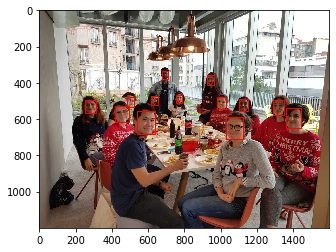

In [5]:
highlight_faces('noel.jpg', faces)

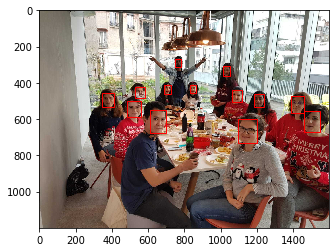

In [6]:
image = plt.imread('noel1.jpg')
faces = detector.detect_faces(image)

highlight_faces('noel1.jpg', faces)

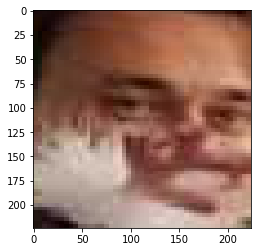

In [10]:
def extract_face_from_image(image_path, required_size=(224, 224)):
  # load image and detect faces
    image = plt.imread(image_path)
    detector = MTCNN()
    faces = detector.detect_faces(image)

    face_images = []

    for face in faces:
        # extract the bounding box from the requested face
        x1, y1, width, height = face['box']
        x2, y2 = x1 + width, y1 + height

        # extract the face
        face_boundary = image[y1:y2, x1:x2]

        # resize pixels to the model size
        face_image = Image.fromarray(face_boundary)
        face_image = face_image.resize(required_size)
        face_array = asarray(face_image)
        face_images.append(face_array)

    return face_images

extracted_face = extract_face_from_image('noel2.jpg')

# Display the first face from the extracted faces
plt.imshow(extracted_face[9])
plt.show()



In [11]:
def get_model_scores(faces):
    samples = asarray(faces, 'float32')

    # prepare the data for the model
    samples = preprocess_input(samples, version=2)

    # create a vggface model object
    model = VGGFace(model='resnet50',
      include_top=False,
      input_shape=(224, 224, 3),
      pooling='avg')

    # perform prediction
    return model.predict(samples)

0 0 0.20425552129745483


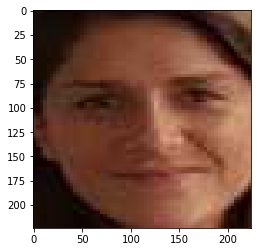

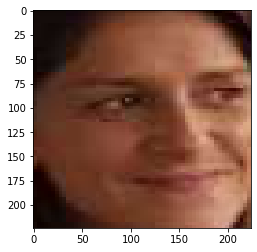

1 1 0.1097266674041748


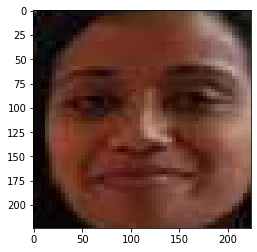

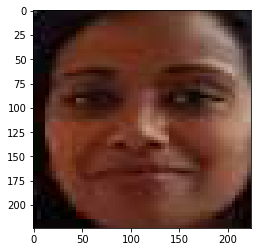

2 5 0.06720304489135742


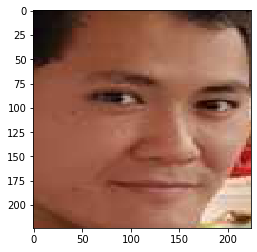

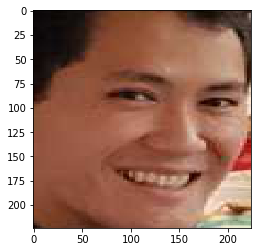

3 4 0.06766283512115479


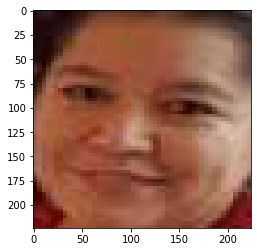

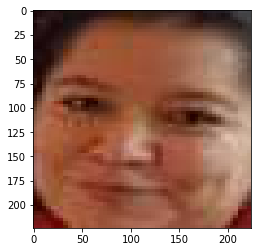

4 11 0.1264166235923767


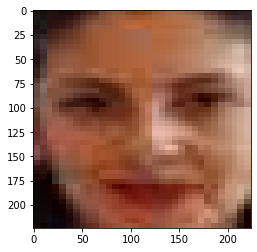

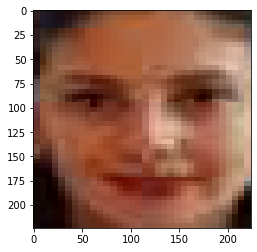

5 3 0.16988152265548706


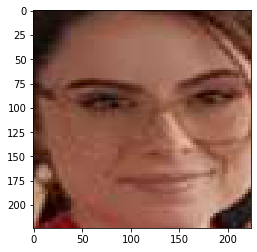

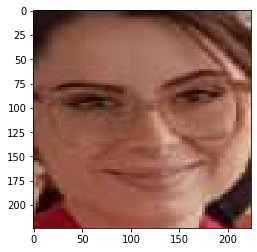

6 2 0.1409294605255127


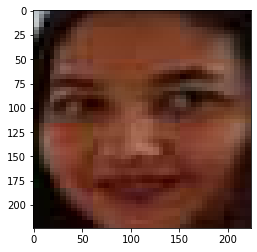

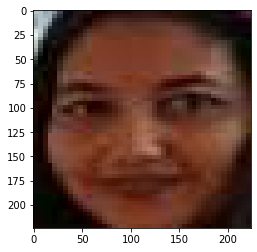

7 8 0.3210788369178772


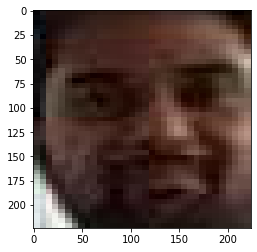

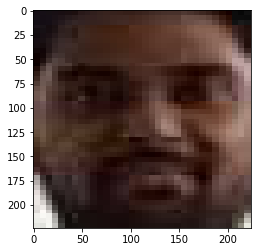

8 6 0.18934482336044312


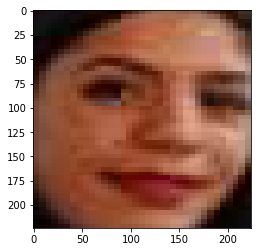

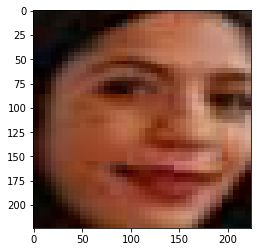

9 7 0.12148696184158325


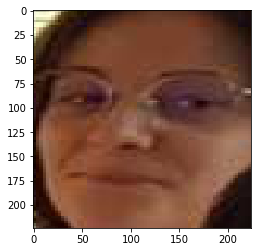

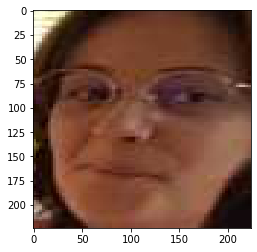

10 10 0.16079246997833252


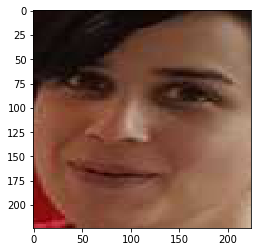

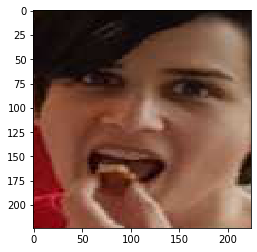

11 12 0.05537134408950806


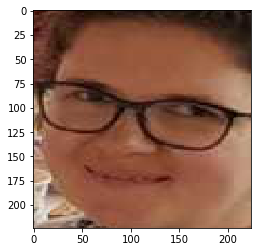

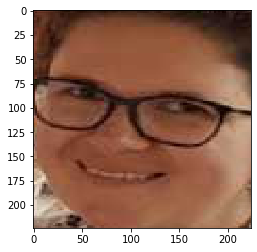

12 9 0.1624806523323059


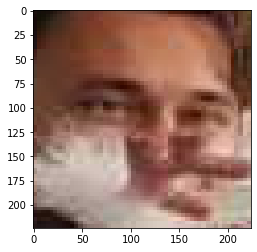

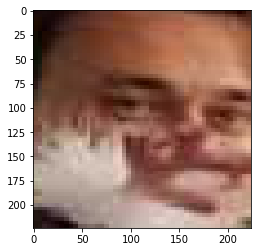

In [14]:
# Ici je compare 2 photos entre elles avec les même personne
family_faces = extract_face_from_image('noel1.jpg')
family2_faces = extract_face_from_image('noel2.jpg')

model_scores_starting_xi_family = get_model_scores(family_faces)
model_scores_starting_xi_family2 = get_model_scores(family2_faces)

for idx, face_score_1 in enumerate(model_scores_starting_xi_family):
    for idy, face_score_2 in enumerate(model_scores_starting_xi_family2):
        score = cosine(face_score_1, face_score_2)
        if score <= 0.4:
      # Printing the IDs of faces and score
            print(idx, idy, score)
      # Displaying each matched pair of faces
            plt.imshow(family_faces[idx])
            plt.show()
            plt.imshow(family2_faces[idy])
            plt.show()

In [ ]:
# Find Yanis in Familly picture 

In [16]:
import os
import cv2
init='D:\MBA-ESG\photo\mariage_1'
# Find the folder and make a list of images 
list_of_images=[cv2.imread(init+'/'+i) for i in os.listdir(init)]

In [18]:
for i in range(0,13):
    faces = detector.detect_faces(list_of_images[i])
    print(faces)
#Detect all the faces of all the pictures

[{'box': [2354, 1117, 296, 382], 'confidence': 0.9996253252029419, 'keypoints': {'left_eye': (2403, 1277), 'right_eye': (2527, 1263), 'nose': (2448, 1362), 'mouth_left': (2432, 1414), 'mouth_right': (2552, 1394)}}, {'box': [1374, 234, 73, 82], 'confidence': 0.8433538675308228, 'keypoints': {'left_eye': (1399, 261), 'right_eye': (1428, 259), 'nose': (1415, 283), 'mouth_left': (1403, 296), 'mouth_right': (1426, 296)}}, {'box': [3209, 2698, 22, 34], 'confidence': 0.747063159942627, 'keypoints': {'left_eye': (3212, 2713), 'right_eye': (3218, 2709), 'nose': (3210, 2718), 'mouth_left': (3216, 2727), 'mouth_right': (3221, 2724)}}]
[{'box': [3192, 688, 172, 241], 'confidence': 0.9973576664924622, 'keypoints': {'left_eye': (3213, 792), 'right_eye': (3276, 778), 'nose': (3217, 833), 'mouth_left': (3220, 882), 'mouth_right': (3279, 870)}}, {'box': [2216, 2012, 14, 19], 'confidence': 0.8885719776153564, 'keypoints': {'left_eye': (2224, 2018), 'right_eye': (2229, 2018), 'nose': (2229, 2023), 'mouth

In [23]:
import os
family_faces = extract_face_from_image('yaya.jpg')
score_yaya=get_model_scores(family_faces)

liste_im=[]
mo_sc_1 = []
for k in range(0,13):
    im = extract_face_from_image(f"D:/MBA-ESG/photo/mariage_1/{k}.jpg")
    mo_sc= get_model_scores(im)
    liste_im.append(im)
    mo_sc_1.append(mo_sc)


1
0.10498273372650146
0 0 0.10498273372650146


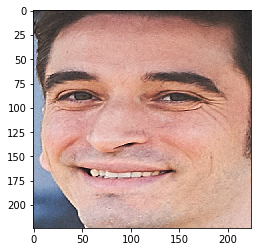

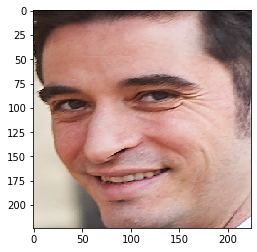

1
0.14589548110961914
0 1 0.14589548110961914


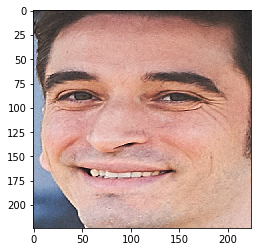

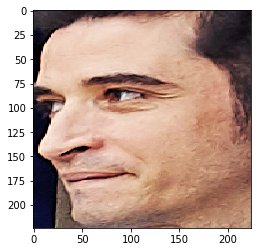

2
no match 2
no match 2
3
no match 2
no match 2
no match 2
3
no match 2
no match 2
no match 2
3
no match 2
no match 2
no match 2
1
0.7501229494810104
no match 1
17
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
3
no match 2
no match 2
no match 2
5
no match 2
no match 2
no match 2
no match 2
no match 2
1
0.647750973701477
no match 1
21
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
21
no match 2
no match 2
0 12 0.1547730565071106


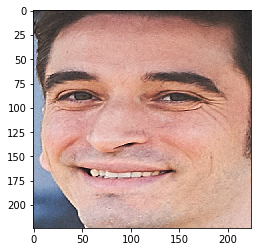

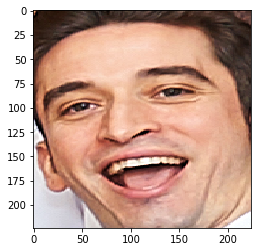

no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
1
0.9288259819149971
no match 1
1
0.9259519800543785
no match 1
2
no match 2
no match 2
3
no match 2
no match 2
no match 2
3
no match 2
no match 2
1 4 0.30950140953063965


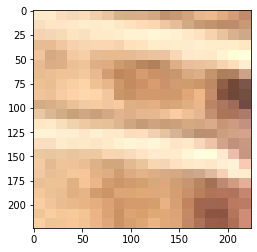

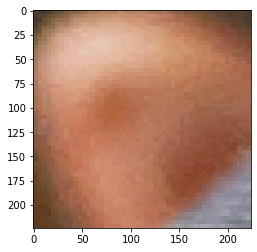

3
no match 2
no match 2
no match 2
1
0.874928429722786
no match 1
17
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
1 7 0.3601711392402649


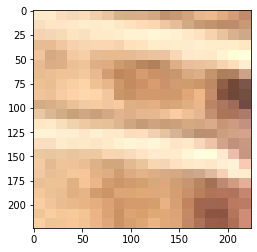

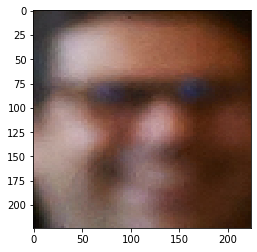

3
no match 2
no match 2
no match 2
5
no match 2
no match 2
no match 2
no match 2
no match 2
1
0.9539410062134266
no match 1
21
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
21
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2
no match 2


In [27]:
yanis_liste=[]
not_match=[]


for idx, face_score_1 in enumerate(score_yaya):
    for idy, face_score_2 in enumerate(huhuh1):
        print(len(face_score_2))
        if len(face_score_2)==1:
            score = cosine(face_score_1, face_score_2[0])
            print(score)
            if score <= 0.4:
          # Printing the IDs of faces and score
                print(idx, idy, score)
          # Displaying each matched pair of faces
                plt.imshow(family_faces[idx])
                plt.show()
                plt.imshow(liste_im[idy][0])
                plt.show()
                yanis_liste.append(liste_im[idy])
            else: 
                print('no match 1')
        else:
            for face in face_score_2:
                score = cosine(face_score_1, face)
                if score <= 0.4:
              # Printing the IDs of faces and score
                    print(idx, idy, score)
              # Displaying each matched pair of faces
                    plt.imshow(family_faces[idx])
                    plt.show()
                    plt.imshow(liste_im[idy][2])
                    plt.show()
                    yanis_liste.append(liste_im[idy])
                else: 
                    print('no match 2')